# 📚📚 Market Basket Analysis(Bread Basket Datatset) with Association Rule 🍳

**ABOUT THE PROJECT**

- The task here is to find the association rules between the items using the Apriori Algorithm. Or in other words, you have to find out those items/itemset that customers bought together which helps the owner for store layout/marketing.
And then show the relative Sales of the data in Tableau Dashboard.

**ABOUT THE DATASET**

- Transaction - Id of the transaction
- Item - Product of that transaction
- date_time - Day and hour
- period_day - Period of the Day (morning, afteernoon, evening, night)
- weekday_weekend - whether it was weekday or weekend

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

import seaborn as sns

## 📌 Import Dataset 📁

In [2]:
df=pd.read_csv("bread_basket.csv")

In [3]:
df

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
...,...,...,...,...,...
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend


In [4]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


## 📌 Data Preprocessing

In [5]:
df.shape

(20507, 5)

In [6]:
df.describe()

,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [7]:
df.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

#### There are no null values in this dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [9]:
# Converting the 'date_time' column into the right format
df['date_time'] = pd.to_datetime(df['date_time'])

In [10]:
df

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:00,morning,weekend
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend
4,3,Jam,2016-10-30 10:07:00,morning,weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:00,afternoon,weekend
20503,9682,Tea,2017-09-04 14:32:00,afternoon,weekend
20504,9683,Coffee,2017-09-04 14:57:00,afternoon,weekend
20505,9683,Pastry,2017-09-04 14:57:00,afternoon,weekend


In [11]:
df.head(10)

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:00,morning,weekend
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend
4,3,Jam,2016-10-30 10:07:00,morning,weekend
5,3,Cookies,2016-10-30 10:07:00,morning,weekend
6,4,Muffin,2016-10-30 10:08:00,morning,weekend
7,5,Coffee,2016-10-30 10:13:00,morning,weekend
8,5,Pastry,2016-10-30 10:13:00,morning,weekend
9,5,Bread,2016-10-30 10:13:00,morning,weekend


In [12]:
# Count of unique customers
df['Transaction'].nunique()

9465

In [13]:
# Extracting date
df['date'] = df['date_time'].dt.date

#Extracting time
df['time'] = df['date_time'].dt.time

# Extracting month and replacing it with text
df['month'] = df['date_time'].dt.month
df['month'] = df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

# Extracting hour
df['hour'] = df['date_time'].dt.hour
#Replacing hours with text
hour_in_num = (1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
hour_in_obj = ('1-2','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
              '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')
df['hour'] = df['hour'].replace(hour_in_num, hour_in_obj)

# Extracting weekday and replacing it with text
df['weekday'] = df['date_time'].dt.weekday
df['weekday'] = df['weekday'].replace((0,1,2,3,4,5,6), 
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

# dropping date_time column
df.drop('date_time', axis = 1, inplace = True)

In [14]:
df.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,Jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


In [15]:
# cleaning the item column
df['Item'] = df['Item'].str.strip()   # used to remove all the leading and trailing spacesfrom a string.
df['Item'] = df['Item'].str.lower()   # used to convert all the letters of the words in the ascending order.

In [16]:
df.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


In [17]:
df.to_csv('bread.csv')   # This csv file is exported to work in the tableau dashboard

## 📌 Data Visualization 📈📊

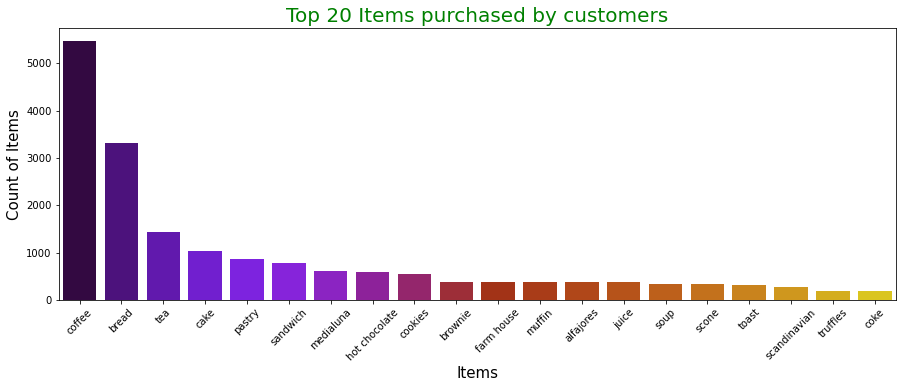

In [18]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.Item.value_counts().head(20).index, y = df.Item.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
plt.show()

### Transaction by Month

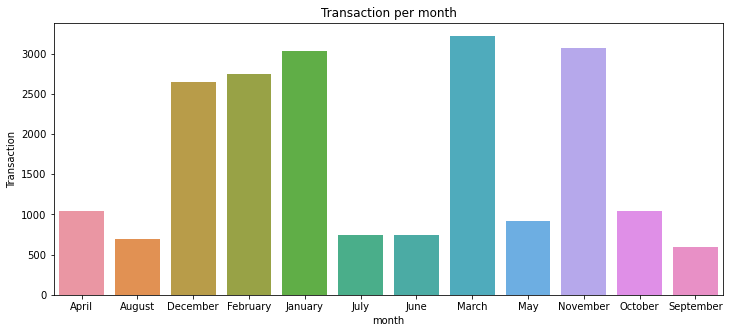

In [19]:
coutbymonth=df.groupby('month')['Transaction'].count().reset_index()
coutbymonth.sort_values('month',inplace=True)

fig = plt.figure(figsize=(12,5))
sns.barplot(x=coutbymonth['month'], y=coutbymonth['Transaction'])
plt.xlabel('month')
plt.ylabel('Transaction')
plt.title('Transaction per month')
plt.show()


#### We can see that most of the transactions were in the March, January and November month.

### Transaction per day of the week

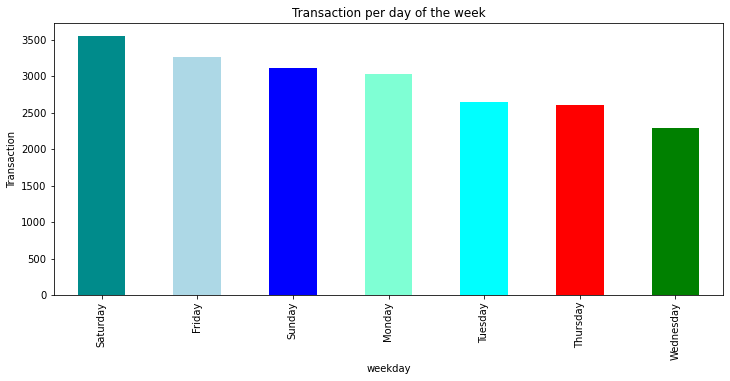

In [20]:
coutbydayp=df.groupby('weekday')['Transaction'].count().reset_index()
coutbydayp.sort_values('weekday',inplace=True)

plt.figure(figsize=(12,5))
df['weekday'].value_counts(dropna = False).plot.bar(color=['darkcyan','lightblue','blue','aquamarine', 'cyan','red', 'green'])
plt.xlabel('weekday')
plt.ylabel('Transaction')
plt.title('Transaction per day of the week')
plt.show()


#### People mostly prefer to order on saturday and friday.

### Transaction per hour of the day

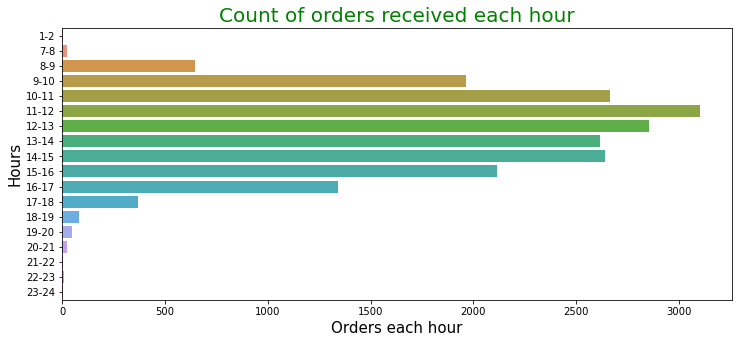

In [21]:
hourTran = df.groupby('hour')['Transaction'].count().reset_index()
hourTran.loc[:,"hourorder"] = [1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,7,8,9]
hourTran.sort_values("hourorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = hourTran, x = "Transaction", y = "hour")
plt.ylabel('Hours', size = 15)
plt.xlabel('Orders each hour', size = 15)
plt.title('Count of orders received each hour', color = 'green', size = 20)
plt.show()

#### We can see that people mostly order in the time period from 11 am to 12 noon and from 12 noon to 1 pm.

### Transaction by Day period

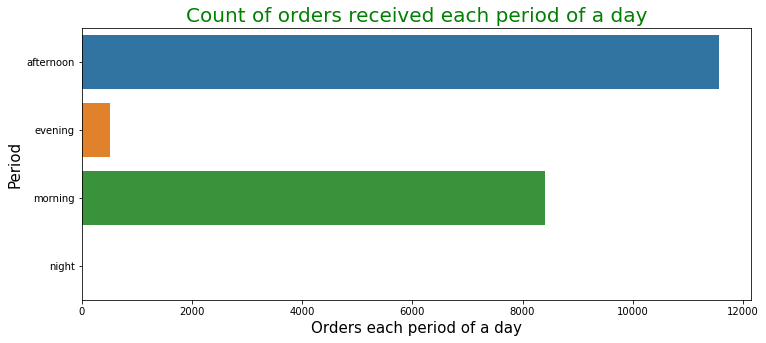

In [22]:
dayTran = df.groupby('period_day')['Transaction'].count().reset_index()

plt.figure(figsize=(12,5))
sns.barplot(data = dayTran, x = "Transaction", y = "period_day")
plt.ylabel('Period', size = 15)
plt.xlabel('Orders each period of a day', size = 15)
plt.title('Count of orders received each period of a day', color = 'green', size = 20)
plt.show()

#### Conclusion:  Most of the People prefer to order in morning and afternoon

### Transaction by week period

In [23]:
df['weekday_weekend'].value_counts()

weekday    12807
weekend     7700
Name: weekday_weekend, dtype: int64

#### People prefer to order in weekdays.

### Top sold product

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'coffee'),
  Text(1, 0, 'bread'),
  Text(2, 0, 'tea'),
  Text(3, 0, 'cake'),
  Text(4, 0, 'pastry'),
  Text(5, 0, 'sandwich'),
  Text(6, 0, 'medialuna'),
  Text(7, 0, 'hot chocolate'),
  Text(8, 0, 'cookies'),
  Text(9, 0, 'brownie'),
  Text(10, 0, 'farm house'),
  Text(11, 0, 'muffin'),
  Text(12, 0, 'alfajores'),
  Text(13, 0, 'juice'),
  Text(14, 0, 'soup'),
  Text(15, 0, 'scone'),
  Text(16, 0, 'toast'),
  Text(17, 0, 'scandinavian'),
  Text(18, 0, 'truffles'),
  Text(19, 0, 'coke'),
  Text(20, 0, 'spanish brunch'),
  Text(21, 0, 'fudge'),
  Text(22, 0, 'baguette'),
  Text(23, 0, 'jam'),
  Text(24, 0, 'tiffin')])

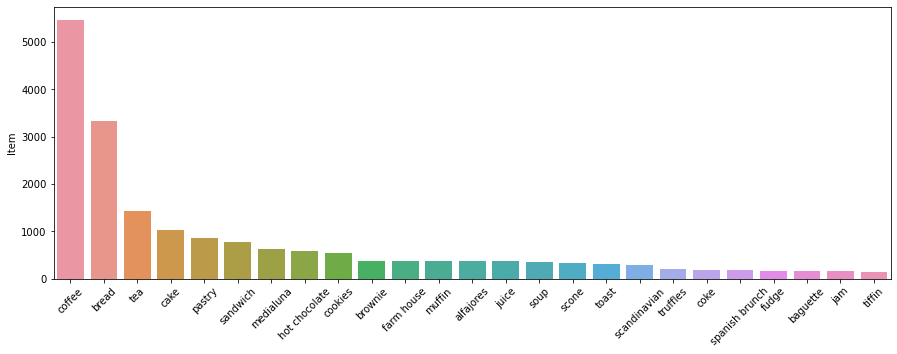

In [24]:
fig = plt.figure(figsize=(15,5))

names = df.Item.value_counts().head(25).index
values = df.Item.value_counts().head(25)
sns.barplot(x = names, y = values)
plt.xticks(rotation=45)

#### Top sold items were: Coffee, Bread, Tea, Cake, Pastry and items with least sell: Tiffin,Jam

## 📌Apriori Algorithm

In [26]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [41]:
from mlxtend.frequent_patterns import association_rules, apriori

In [42]:
transactions_str = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions_str

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
...,...,...,...
18882,9682,tacos/fajita,1
18883,9682,tea,1
18884,9683,coffee,1
18885,9683,pastry,1


In [43]:
# making a mxn matrice where m=transaction and n=items and each row represents 
#whether the item was in the transaction or not
my_basket = transactions_str.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)


my_basket.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# making a function which returns 0 or 1
# 0 means item was not in that transaction, 1 means item present in that transaction

def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

my_basket_sets = my_basket.applymap(encode)
my_basket_sets.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# using the 'apriori algorithm' with min_support=0.01 (1% of 9465)
# It means the item should be present in atleast 94 transaction out of 9465 transactions only when we considered that item in
# frequent itemset

# using the 'apriori algorithm' with min_support=0.01 (1% of 9465)
# It means the item should be present in atleast 94 transaction out of 9465 transactions only when we considered that item in
# frequent itemset
frequent_items = apriori(my_basket_sets, min_support = 0.01,use_colnames = True)
frequent_items

,support,itemsets
0,0.036344,(alfajores)
1,0.016059,(baguette)
2,0.327205,(bread)
3,0.040042,(brownie)
4,0.103856,(cake)
...,...,...
56,0.023666,"(coffee, toast)"
57,0.014369,"(tea, sandwich)"
58,0.010037,"(cake, coffee, bread)"
59,0.011199,"(coffee, bread, pastry)"


In [46]:
# now making the rules from frequent itemset generated above

rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
29,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
18,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
1,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
16,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
25,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
6,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
27,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
12,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


In [47]:
# arranging the data from highest to lowest with respect to 'confidence'

rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
29,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
18,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
1,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
16,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
25,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
6,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
27,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
12,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


#### We can clearly see that coffee is an item that is very associated with other purchases in the bakery, such as toast, bread, tea, cake, sandwitch, medialuna and pastry

# THANK YOU